In [2]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

In [3]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)
        #print(gradient)
        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [4]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

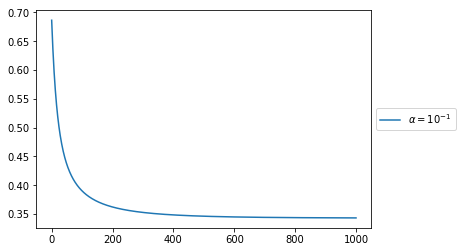

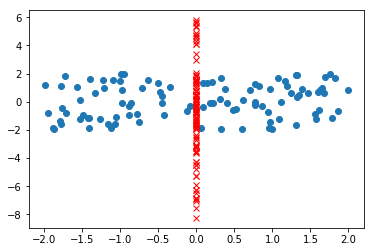

[[ 1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.
  -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.
  -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
   1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1.
   1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
  -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.]]
5


In [8]:
# load in dataset
csvname = datapath + '3d_classification_data_v0.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
w = 0.1*np.random.randn(3,1)
x0 = np.insert(x,0,1,axis=0)
g = softmax
max_its = 1000; alpha_choice = 10**(-1)
weight_history1,cost_history1 = gradient_descent(g,alpha_choice, max_its, w)
plot_cost_histories([cost_history1],labels = [r'$\alpha = 10^{-1}$'])
yfit = model(x0,weight_history1[-1])
plt.figure()
plt.scatter(x[0],x[1])
plt.plot(0,yfit,'rx')
#plt.plot(x[1],y[0],'ro')
#plt.plot(x.T,yfit.T)
plt.show()
for i in range(0,len(yfit.T)):
    if(yfit.T[i]> 0):
        yfit.T[i] = 1
    else:
        yfit.T[i] = -1

print(yfit)
for k in range(max_its):
    
    mis = identity_func(yfit,y)

    

print(mis)



In [5]:
def model(x0,w):
    a =  np.dot(x0.T,w)
    return a.T

In [6]:
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x0,w))))
    return cost/float(np.size(y))

In [7]:
def identity_func(yfit,y):
    no_of_miscalc = 0;
    for i in range(0,y.size):
        if(yfit.T[i] != y.T[i]):
            no_of_miscalc +=1

    return no_of_miscalc
        